<a href="https://colab.research.google.com/github/EduHdzVillasana/CDMX-Crime-Analysis/blob/main/CDMX_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio

## Carga de Datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
mainpath = "/content/drive/MyDrive/Datasets"
filename = "CrimenesCDMX.csv"
df_raw = pd.read_csv(os.path.join(mainpath, filename))
df_raw.sample(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_id,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
515995,515996,2019.0,Junio,2019-06-29 15:00:00,2019,Junio,2019-06-30T01:05:34,ROBO DE ACCESORIOS DE AUTO,INVESTIGACIÓN EN COYOACÁN,COY-2,UI-3CD,DELITO DE BAJO IMPACTO,AVENIDA DEL CONVENTO,NaN,SAN DIEGO CHURUBUSCO,COYOACAN,NaN,-99.148870,19.353110,NaN
109937,109938,2017.0,Septiembre,2017-09-08 16:40:00,2017,Septiembre,2017-09-08T17:51:13,DENUNCIA DE HECHOS,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-1CD,HECHO NO DELICTIVO,AVENIDA PASEO DE LA REFORMA,NaN,CENTRO,CUAUHTEMOC,NaN,-99.149932,19.435058,NaN
139117,139118,2018.0,Enero,2018-01-30 13:38:00,2018,Enero,2018-01-30T14:17:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,FRANCISCO GOITIA,NaN,SANTIAGO TEPALCATLALPAN,XOCHIMILCO,NaN,-99.108667,19.256513,NaN
675447,675448,2018.0,Julio,2018-07-19 22:15:00,2018,Julio,2018-07-19T23:28:00,AMENAZAS,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-1,UI-3SD,DELITO DE BAJO IMPACTO,OLIVOS,PIRULES,ARBOLEDAS DE CUAUTEPEC EL ALTO,GUSTAVO A MADERO,NaN,-99.122750,19.562892,NaN
1141279,1141280,2021.0,Enero,2021-01-03 12:00:00,2021,Enero,2021-01-12T11:37:55,DESPOJO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MIGUE...,MH-2,UI-1SD,DELITO DE BAJO IMPACTO,CALLE UNO,AV. LEGARIA,DEPORTIVO PENSIL,MIGUEL HIDALGO,FUERO COMUN,-99.203353,19.449260,NaN


In [6]:
df_raw["fecha_hechos"] = pd.to_datetime(df_raw["fecha_hechos"])

In [8]:
df_raw["fecha_inicio"] = pd.to_datetime(df_raw["fecha_inicio"])

In [12]:
df_raw.shape

(1168250, 20)

In [10]:
df_raw.isna().sum()

_id                           0
ao_hechos                   433
mes_hechos                  433
fecha_hechos                433
ao_inicio                     0
mes_inicio                    0
fecha_inicio                  0
delito                        0
fiscalia                      2
agencia                       0
unidad_investigacion        227
categoria_delito              0
calle_hechos               2969
calle_hechos2            709215
colonia_hechos            47433
alcaldia_hechos            3177
competencia             1064079
longitud                  46465
latitud                   46465
tempo                   1168250
dtype: int64

In [21]:
df_data = df_raw.drop(columns = ["ao_hechos","mes_hechos","ao_inicio","mes_inicio","calle_hechos2","competencia","tempo"])
df_data.isna().sum()

_id                         0
fecha_hechos              433
fecha_inicio                0
delito                      0
fiscalia                    2
agencia                     0
unidad_investigacion      227
categoria_delito            0
calle_hechos             2969
colonia_hechos          47433
alcaldia_hechos          3177
longitud                46465
latitud                 46465
dtype: int64

In [22]:
df_data.sample()

,_id,fecha_hechos,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud
878941,878942,2017-07-08 18:00:00,2018-04-16 14:27:00,VIOLENCIA FAMILIAR,JUZGADOS FAMILIARES,75BIS,2 S/D,DELITO DE BAJO IMPACTO,ESTRELLA,VERTIZ NARVARTE,BENITO JUAREZ,-99.155324,19.380569


In [33]:
import datetime as dt
df_data["Fecha"] = df_data["fecha_hechos"].dt.date

In [34]:
df_data.sample(2)

,_id,fecha_hechos,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud,Fecha
682921,682922,2019-02-05 16:00:00,2019-02-05 18:30:50,"PORTACIÓN, FABRICACIÓN E IMPORTACIÓN DE OBJETO...",INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,DELITO DE BAJO IMPACTO,EJE 8 SUR (CALZ. ERMITA IZTAPALAPA),SANTA MARTHA ACATITLA,IZTAPALAPA,-99.005940,19.356250,2019-02-05
1143399,1143400,2021-01-15 21:15:00,2021-01-15 21:47:55,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN BENIT...,BJ-2,UI-2CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,PUENTE DE LA MORENA,SAN PEDRO DE LOS PINOS,BENITO JUAREZ,-99.181282,19.395525,2021-01-15


In [40]:
crimenes_ts = df_data[["_id","Fecha"]].groupby(["Fecha"]).count()

In [42]:
crimenes_ts.sample(3)

,_id
Fecha,
2015-08-18,39
2017-05-04,671
2020-02-26,734


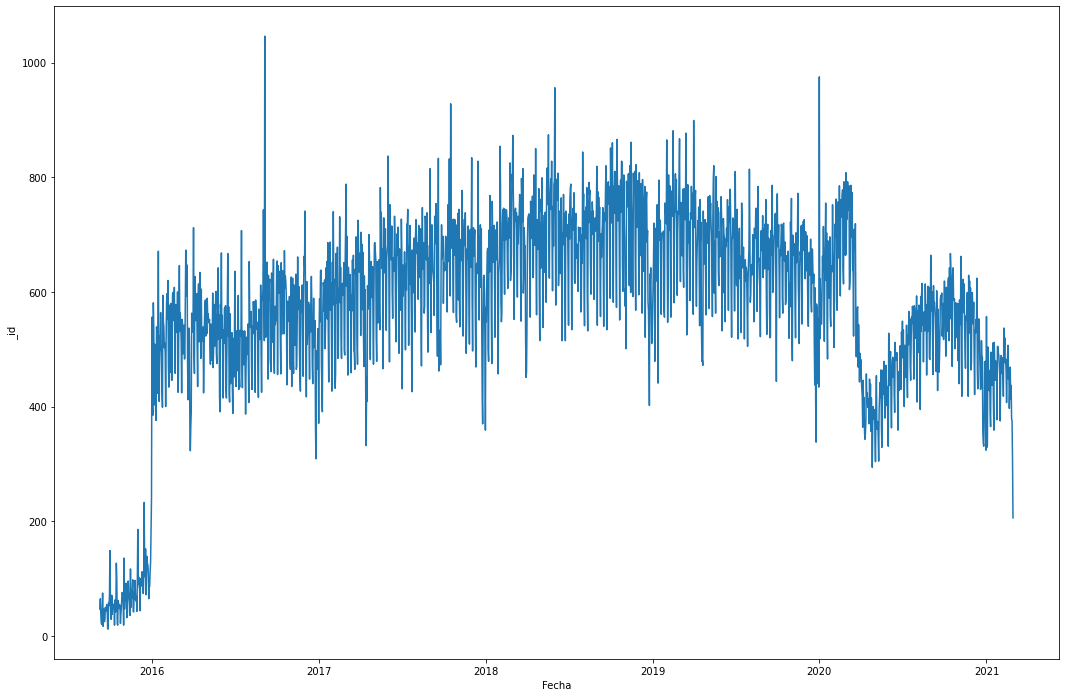

In [50]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x = crimenes_ts.index[-2000:], y = crimenes_ts["_id"][-2000:], ax = ax)